Exercise 1 and 2:


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize

Use one-sided finite differences to compute an approximation to the first derivative of $g(p)=$ $0.5 p^{-0.5}+0.5 p^{-0.2}$ at $p=1.5$. Let the increment $\epsilon$ in the finite differences range across all the values in the set $\left\{10^{-1}, 10^{-2}, \ldots, 10^{-10}\right\}$. For which value of $\epsilon$ the approximate first derivative the most accurate? Repeat the third problem using two-sided finite differences to approximate the first derivative

In [86]:
def g(p):
    return 0.5*p**(-0.5) + 0.5*p**(-0.2)

In [87]:
def OSD(p, Δ):
    return (g(p+Δ) - g(p))/ Δ 

In [88]:
def TSD(p, Δ):
    return (g(p+Δ) - g(p-Δ))/ (2*Δ) 

In [89]:
OSD = np.vectorize(OSD)
TSD = np.vectorize(TSD)

In [90]:
ϵ= 10**(-1* np.linspace(1,10,10))
p_point = np.linspace(1,1,10) * 1.5
truth = -(0.5**2) * 1.5**(-1.5) - 0.5 * 0.2 * 1.5**(-1.2)

In [91]:
error_OSD = OSD(p_point, ϵ) - truth
error_TSD = TSD(p_point, ϵ) - truth

In [92]:
np.abs(error_OSD), np.abs(error_TSD)

(array([8.79174498e-03, 9.21355323e-04, 9.25811321e-05, 9.26259451e-06,
        9.26308407e-07, 9.26752449e-08, 9.85260723e-09, 8.74238421e-09,
        1.34620763e-08, 2.08582529e-07]),
 array([4.99911551e-04, 4.98240048e-06, 4.98223799e-08, 4.98557140e-10,
        6.17320084e-12, 2.83776891e-11, 1.39399992e-10, 3.19126908e-09,
        1.34620763e-08, 3.46528984e-07]))

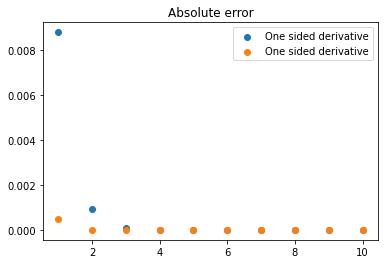

In [93]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10), np.abs(error_OSD), label="One sided derivative")
ax.scatter(np.linspace(1,10,10), np.abs(error_TSD), label="One sided derivative")
plt.title("Absolute error")
plt.legend()
plt.show()

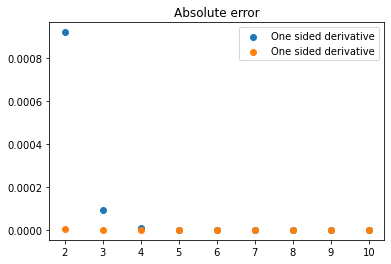

In [94]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10)[1:], np.abs(error_OSD)[1:], label="One sided derivative")
ax.scatter(np.linspace(1,10,10)[1:], np.abs(error_TSD)[1:], label="One sided derivative")
plt.title("Absolute error")
plt.legend()
plt.show()

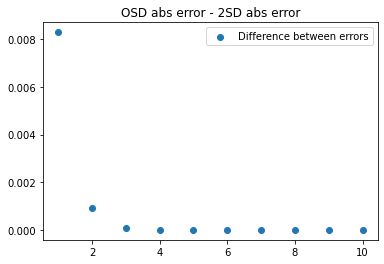

In [95]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10),np.abs(error_OSD) - np.abs(error_TSD), label="Difference between errors")
plt.title("OSD abs error - 2SD abs error")
plt.legend()
plt.show()

In [96]:
np.min(np.abs(error_OSD)), ϵ[np.argmin(np.abs(error_OSD))]

(8.742384205451259e-09, 1e-08)

In [97]:
np.min(np.abs(error_TSD)), ϵ[np.argmin(np.abs(error_TSD))]

(6.1732008393988735e-12, 1e-05)

The minimum absolute error for the one sided derivative is achieved when $\Delta=10^{-08}$. The minimum absolute error for the two sided derivative is achieved when $\Delta=10^{-05}$. At the minimum, the Two sided derivative has a smaller absolute error compare to the One sided derivative. For a more detailed discussion see the pdf attached.

Exercises 3 and 4:

Use the bisection, secant, and Newton's methods to compute an estimate of $p_0$, where $g\left(p_0\right)=$ $0.75$ (and $g$ is defined in the first problem). For each method, report how many iterations are required to compute an estimate $\hat{p}$ satisfying $\left|f(\hat{p})-f\left(p_0\right)\right|<10^{-6}$.

Repeat the last problem using Brent's method as described in Chapter $9.3$ of Numerical Recipes in Fortran.

In [98]:
def g_tilda(p):
    return 0.5*p**(-0.5) + 0.5*p**(-0.2) - 0.75

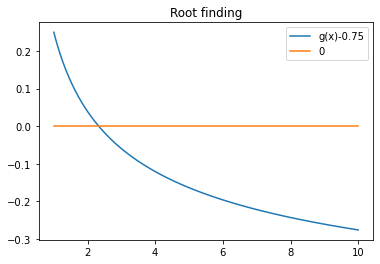

In [99]:
ax, fig = plt.subplots()
plt.plot(np.linspace(1,10,100), g_tilda(np.linspace(1,10,100)), label="g(x)-0.75")
plt.plot(np.linspace(1,10,100), g_tilda(np.linspace(1,10,100))*0, label="0")
plt.title("Root finding")
plt.legend()
plt.show()

In [100]:
precision = 10**(-6)

In [101]:
def secant(x0,x1,e,N):
    step = 1
    condition = True
    while condition:
        x2 = x0 - (x1-x0)*g_tilda(x0)/( g_tilda(x1) - g_tilda(x0) ) 
        x0 = x1
        x1 = x2
        step = step + 1
        if step > N:
            print('Max iter achieved')
            break
        condition = abs(g_tilda(x2)) > e
    print('Total Iterations ' + str( step))
    print('Root:' + str(x2))

In [102]:
secant(0.1,3,precision,100)

Total Iterations 6
Root:2.327576829233226


In [103]:
scipy.optimize.newton(g_prime, 0.1, fprime=None, args=(), tol=precision, maxiter=100, fprime2=None, x1=None, rtol=0.0, full_output=True, disp=True)

(2.3275801395267837,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 11
            root: 2.3275801395267837)

In [104]:
def Bisection(f, x_0, x_1, precision, steps): 
    
    if np.sign(f(x_0)) == np.sign(f(x_1)):
        raise Exception("Cannot bracket root")
    m = (x_0 + x_1)/2
    if np.abs(f(m)) < precision:
        return m, steps
    elif np.sign(f(x_0)) == np.sign(f(m)):
        return Bisection(f, m, x_1, precision, (steps + 1))
    elif np.sign(f(x_1)) == np.sign(f(m)):
        return Bisection(f, x_0, m, precision, (steps + 1))

In [105]:
Bisection(g_prime, 0.1, 3, precision, 0)

(2.3275806427001955, 17)

In [106]:
scipy.optimize.brentq(g_prime, 0.1, 3, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=True, disp=True)

(2.3275801395268103,
       converged: True
            flag: 'converged'
  function_calls: 9
      iterations: 8
            root: 2.3275801395268103)

Iterations needed to compute ${\hat{p}}$:

|Method|Iterations|
| ---- | ----     |
|Newton's      |     11     |
|Bisection     |    17     |
|Secant        |   6      |
|Brent's      |    8  |

For a detailed explanation about what each algorithm does see attached pdf. The 2 Methods that are always well defined are Brent's and the Bisection. BIsection method is in general the slowest. When working with well behaved functions, NW is the fastest algorithm. Brent combines all of the above with an inverse quadratic equation for iterations that satisfy certain conditions.

Exercise 5

In [88]:
# Define Parameters:
n_k = np.linspace(30,500, dtype=int) # Grids for capitals
n_A = 15  # Markov States.
δ = 0.9   # Depreciation.
α = 0.7   # Capital Share.
ρ = 0.98  # Memory of income.
σ = 0.01  # Volatility of income.
β = 0.98
error = 10e-6 # Error tolerance.
# Construct the markov chain using rouwenhorst method:
markov = qe.markov.approximation.rouwenhorst(n= n_A, ybar = 1-ρ, sigma=σ, rho= ρ)
# Probability matrix and states:
# note that element (i,j) of P represents the transition probability
# of going to state "j" given that we are in state "i".
Π = markov.P   
A = markov.state_values  
# Maximum sustainable Capital:
K_max = (A[-1]/δ)**(1/(1-α))
K_min = (A[0]/δ)**(1/(1-α)) * 0.25
# Capital grid a column vector:
K = np.linspace(K_min, K_max, n_k[0])
# Utility function
def U(c):
    if (c>=0).all()>0.0001:
        return 0.5*((c)**(0.5))
    else:
        return np.where(c <= 0.0001, -10e5, 0.5*(c)**(0.5))
# Convergence criteria:
#''' Inputs: Matrices of optimal capital for the n and n+1 iteration.
#    Outputs: Maximum differences between both '''
#def CC(k_0, k_1):
#    return np.nanmax()

In [116]:


while iter < max_iter:
    for r in range(n_A):
        for c in range(n_k[C]):
            V_1[r,c] = np.amax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)
            h_1[r,c] = np.argmax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)
    if np.amax(np.abs(V_1 - V_0))< error:
        print("Solution Found")
        print(f'Iterations', iter)
        print(f'Error', np.amax(np.abs(V_1 - V_0)))
        break
    else:
        V_0 = np.copy(V_1)
        iter += 1
        if iter >= max_iter:
            print("No solution")

C:\Users\Hogar\AppData\Local\Temp\ipykernel_19104\3551243856.py:27: RuntimeWarning: invalid value encountered in sqrt
  return np.where(c <= 0.0001, -10e5, 0.5*(c)**(0.5))


Solution Found
Iterations 486
Error 9.883246606889884e-06


In [1]:
import quantecon as qe
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy import optimize

In [2]:
#Non stochastic economy:

# Compute the value function for the Non-stochastic economy first, and an obtain the policies. Them we can apply the algorithm for exercise a).

# Define Parameters:
n_k = np.linspace(30,500, dtype=int) # Grids for capitals
n_A = 15  # Markov States.
δ = 0.9   # Depreciation.
α = 0.7   # Capital Share.
ρ = 0.98  # Memory of income.
σ = 0.0  # Volatility of income.
β = 0.98  #Discont factor.
C = 3 # Choice of grid fo capital.
θ = 2 # Expanding grid coefficient.
error = 10e-6 # Error tolerance.
# Construct the markov chain using rouwenhorst method:
markov = qe.markov.approximation.rouwenhorst(n= n_A, ybar = 1-ρ, sigma=σ, rho= ρ)
# Probability matrix and states:
# note that element (i,j) of P represents the transition probability
# of going to state "j" given that we are in state "i".
Π = markov.P   
A = markov.state_values  
# Maximum sustainable Capital:
K_max = (A[-1]/δ)**(1/(1-α))
K_min = (A[0]/δ)**(1/(1-α)) * 0.1
# Use and expanding grid:
K = K_min + (K_max - K_min) * (np.linspace(0, 1, n_k[C])**θ)
# Utility function
def U(c):
    if (c>=0).all()>0.0001:
        return 0.5*((c)**(0.5))
    else:
        return np.where(c <= 0.0001, -10e5, 0.5*(c)**(0.5))
# Convergence criteria:
#''' Inputs: Matrices of optimal capital for the n and n+1 iteration.
#    Outputs: Maximum differences between both '''
#def CC(k_0, k_1):
#    return np.nanmax()

V_0 = np.ones((n_A, n_k[C]))
V_1 = np.copy(V_0)
h_1 = np.ones((n_A, n_k[C]), dtype=int)
iter = 0
max_iter = 1000

while iter < max_iter:
    for r in range(n_A):
        for c in range(n_k[C]):
            V_1[r,c] = np.amax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)
            h_1[r,c] = np.argmax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)
    if np.amax(np.abs(V_1 - V_0))< error:
        print("Solution Found")
        print(f'Iterations', iter)
        print(f'Error', np.amax(np.abs(V_1 - V_0)))
        break
    else:
        V_0 = np.copy(V_1)
        iter += 1
        if iter >= max_iter:
            print("No solution")

VNSS = V_1.copy()
h_NSS = h_1.copy()
VNSS, h_NSS, K[h_NSS]

C:\Users\Hogar\AppData\Local\Temp\ipykernel_17580\4132327118.py:33: RuntimeWarning: invalid value encountered in sqrt
  return np.where(c <= 0.0001, -10e5, 0.5*(c)**(0.5))


Solution Found
Iterations 486
Error 9.86491967580605e-06


(array([[ 9.97322147,  9.97376179,  9.97536632,  9.97798796,  9.98155469,
          9.9862673 ,  9.99184885,  9.99810258, 10.00541085, 10.01321844,
         10.02185962, 10.03103297, 10.0409262 , 10.05101264, 10.06166108,
         10.072607  , 10.08383534, 10.09556336, 10.10732563, 10.11924678,
         10.13150071, 10.14377773, 10.156168  , 10.16870103, 10.18123081,
         10.19390614, 10.20688963, 10.2193943 , 10.23204825, 10.24467753,
         10.2572694 , 10.2699483 , 10.28241087, 10.29503337, 10.30762436,
         10.32003826, 10.33243844, 10.34481148, 10.35721712, 10.36956502,
         10.3817716 , 10.39393883, 10.40596033, 10.41809689, 10.43002622,
         10.44203092, 10.45396964, 10.46580485, 10.47765815, 10.48933586,
         10.50101681, 10.51254786, 10.52415238, 10.53554658, 10.54696721,
         10.55833157, 10.56972321, 10.58086968],
        [ 9.97322147,  9.97376179,  9.97536632,  9.97798796,  9.98155469,
          9.9862673 ,  9.99184885,  9.99810258, 10.00541085, 10

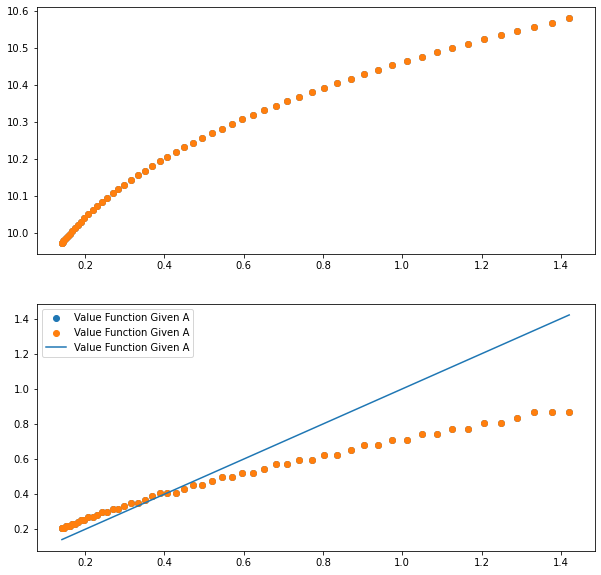

In [3]:
fig, ax  = plt.subplots(2, figsize=(10,10))
ax[0].scatter(K, V_1[3,:], label="Value Function Given A")
ax[0].scatter(K, V_1[10,:], label="Value Function Given A")
ax[1].scatter(K, K[h_1[3,:]], label="Value Function Given A")
ax[1].scatter(K, K[h_1[10,:]], label="Value Function Given A")
ax[1].plot(K, K, label="Value Function Given A")
#plt.title("OSD abs error - 2SD abs error")
plt.legend()
plt.show()


In [5]:
#Interpolation Economy:

#Construct the expanding grid.

σ = 0.01 # Volatility of income.
# Construct the markov chain using rouwenhorst method:
markov = qe.markov.approximation.rouwenhorst(n= n_A, ybar = 1-ρ, sigma=σ, rho= ρ)
# Probability matrix and states:
# note that element (i,j) of P represents the transition probability
# of going to state "j" given that we are in state "i".
Π = markov.P   
A = markov.state_values  
#Now initiliaze the new code at the NSS:

V_0 = VNSS.copy()
h_0 = K[h_NSS.copy()]
h_int = np.zeros((n_A, n_k[C]), dtype=float)
V_1 = np.zeros((n_A, n_k[C]))
iter = 0
# First Loop:
# From V_0, k_0, get V_1, k_1:

while iter < max_iter:
    for r in range(n_A):
        for c in range(n_k[C]):
            # First Obtain the interporaled expected value of V, given A today:
            # We have the array for different values for capital, we just need 
            # to get the array of expected values for the value function given
            # the choice for today.
            E_V = CubicSpline(K, Π[r,:] @ V_0 , bc_type="natural")
            def FOC(kp):
                Δ = 10e-5
                def Return_f(kp):
                    if ( A[r] * K[c]**α + (1-δ) * K[c] - kp) <= 0:
                        return np.nan
                    return U( A[r] * K[c]**α + (1-δ) * K[c] - kp) + β * E_V(kp)
                Return_f = np.vectorize(Return_f)
                if np.isnan(Return_f(kp + Δ)):
                    return -100
                if np.isnan(Return_f(kp - Δ)):
                    return -100
                return (Return_f(kp + Δ) - Return_f(kp - Δ)) / ( 2 * Δ )
            FOC = np.vectorize(FOC)    
            #h_1[r,c] = scipy.optimize.brentq(FOC, K_min, K_max, args=(), xtol=2e-12, rtol=error, maxiter=100, full_output=False, disp=True)
            h_int[r,c] = scipy.optimize.newton(FOC, K_min, fprime=None, args=(), tol=error, maxiter=10000, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)
            V_1[r,c] = U( A[r] * K[c]**α + (1-δ) * K[c] - h_int[r,c]) + β * E_V(h_int[r,c])
    if np.amax((h_int - h_0)/(1 + np.abs(h_0)))< error:
        print("Solution Found")
        break
    else:
        print(iter)
        print(np.amax((h_int - h_0)/(1 + np.abs(h_0))))
        iter += 1
        V_0 = V_1.copy()
        h_0 = h_int.copy()
        

0
0.08162039205454284
1
0.018762320505319518
2
0.010760732388406132
3
0.005711439811166493
4
0.0026609074389167546
5
0.0017183978041000383
6
0.0010768666589644252
7
0.0006512742991639028
8
0.00039141294732008685
9
0.0002352082727341135
10
0.0001416254324553732
11
8.540856865376472e-05
12
5.1581479825590854e-05
13
3.118955267602383e-05
14
1.8877195857479868e-05
15
1.1433750540321416e-05
Solution Found


In [35]:
h_int[r,c] = scipy.optimize.newton(FOC, K_min, fprime=None, args=(), tol=error, maxiter=10000, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)
V_1[r,c] = U( A[r] * K[c]**α + (1-δ) * K[c] - h_int[r,c]) + β * E_V(h_int[r,c])

RuntimeError: Failed to converge after 10000 iterations, value is nan.

In [6]:
h_0

array([[0.16192023, 0.16220536, 0.16305894, 0.16447564, 0.16644711,
        0.16896206, 0.1720055 , 0.17556224, 0.17961313, 0.18414045,
        0.18912255, 0.19454018, 0.20037314, 0.20659967, 0.21320212,
        0.22015985, 0.22745424, 0.23507032, 0.24298873, 0.25119472,
        0.2596752 , 0.26841341, 0.27739952, 0.28662014, 0.29606192,
        0.30571917, 0.3155782 , 0.32563137, 0.33587092, 0.34628561,
        0.35687399, 0.36762333, 0.37853117, 0.38959007, 0.40079335,
        0.41214023, 0.42361902, 0.4352316 , 0.4469678 , 0.45883052,
        0.47080918, 0.48290568, 0.49511208, 0.50742914, 0.51985166,
        0.53237815, 0.5450038 , 0.55772779, 0.57054814, 0.58346256,
        0.59646699, 0.60956148, 0.62274289, 0.63601189, 0.64936196,
        0.66279647, 0.67630854, 0.68990341],
       [0.16830211, 0.16859883, 0.16948708, 0.17096135, 0.17301297,
        0.1756303 , 0.17879762, 0.18249928, 0.18671518, 0.19142684,
        0.19661183, 0.20225103, 0.20832103, 0.21480196, 0.22167407,
   

In [ ]:
E_V = CubicSpline(K, Π[r,:] @ V_0 , bc_type="natural")
            def FOC(kp):
                Δ = 10e-5
                def Return_f(kp):
                    if ( A[r] * K[c]**α + (1-δ) * K[c] - kp) <= 0:
                        return np.nan
                    return U( A[r] * K[c]**α + (1-δ) * K[c] - kp) + β * E_V(kp)
                Return_f = np.vectorize(Return_f)
                return (Return_f(kp + Δ) - Return_f(kp - Δ)) / ( 2 * Δ )
            #h_1[r,c] = scipy.optimize.brentq(Equation, K_min, K_max, args=(), xtol=2e-12, rtol=error, maxiter=100, full_output=False, disp=True)
            h_int[r,c] = scipy.optimize.newton(FOC, K_min, fprime=None, args=(), tol=error, maxiter=10000, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)

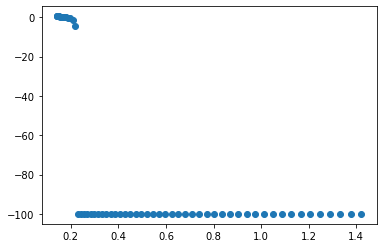

In [59]:
r = 0
c = 0
E_V = CubicSpline(K, Π[r,:] @ V_0 , bc_type="natural")
def FOC(kp):
    Δ = 10e-5
    def Return_f(kp):
        if ( A[r] * K[c]**α + (1-δ) * K[c] - kp) <= 0:
            return np.nan
        return U( A[r] * K[c]**α + (1-δ) * K[c] - kp) + β * E_V(kp)
    Return_f = np.vectorize(Return_f)
    if np.isnan(Return_f(kp + Δ)):
        return -100
    if np.isnan(Return_f(kp - Δ)):
        return -100
    return (Return_f(kp + Δ) - Return_f(kp - Δ)) / ( 2 * Δ )
FOC = np.vectorize(FOC)
fig, ax  = plt.subplots()
ax.scatter(K, FOC(K))
plt.show()

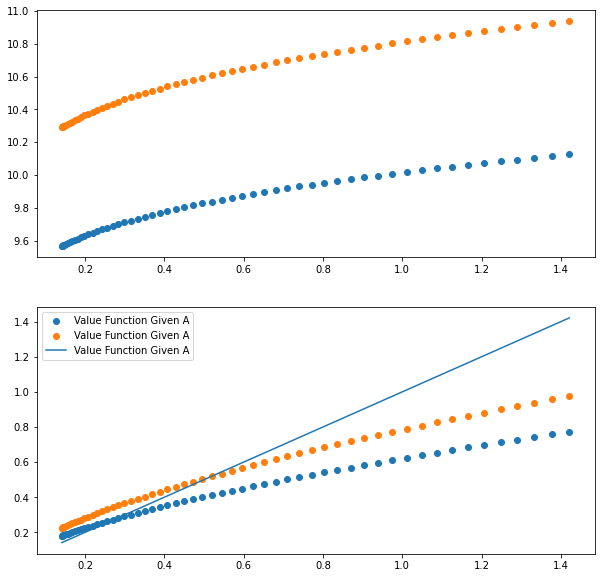

In [7]:
fig, ax  = plt.subplots(2, figsize=(10,10))
ax[0].scatter(K, V_1[3,:], label="Value Function Given A")
ax[0].scatter(K, V_1[10,:], label="Value Function Given A")
ax[1].scatter(K, h_int[3,:], label="Value Function Given A")
ax[1].scatter(K, h_int[10,:], label="Value Function Given A")
ax[1].plot(K, K, label="Value Function Given A")
#plt.title("OSD abs error - 2SD abs error")
plt.legend()
plt.show()